## Steps involved in PCA


*   Step 1: Center the dataset

*   Step 2: Calculate the covariance matrix of the centered data

*   Step 3: Compute the eigenvectors and eigenvalues

*   Step 4: Sort the eigenvalues in descending order and choose the top k eigenvectors corresponding to the highest eigenvalues

*   Step 5: Transform the original data by multiplying it with the selected eigenvectors(PCs) to obtain a lower-dimensional representation.


In [2]:
import numpy as np
import matplotlib.pyplot as plt

##Observe the dataset
Let's take a dataset $\displaystyle \mathbf{X}$ of shape (d,n) where

* $d$: no. of features

* $n$: no. of datapoints

In [3]:
X = np.array([(4,1),(5,4),(6,3),(7,4),(2,-1),(-1,-2),(0,-3),(-1,-4)]).T

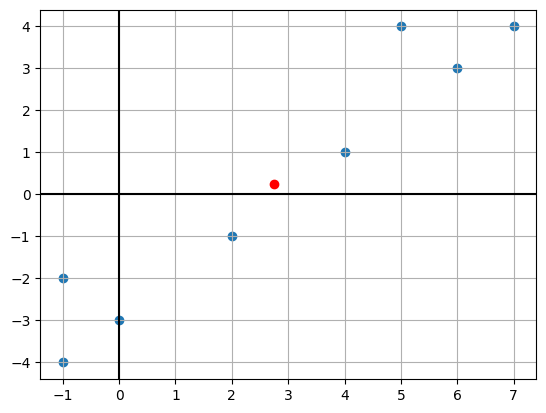

In [3]:
plt.scatter(X[0,:],X[1,:])
plt.axhline(0,color='k')
plt.axvline(0,color='k')

x_mean = X.mean(axis=1)

plt.scatter(x_mean[0],x_mean[1],color='r')
plt.grid()
plt.show()

## Center the dataset

In [4]:
def center(X):
    return X - X.mean(axis = 1).reshape(2,1)

d, n = X.shape
X_centered = center(X)

In [5]:
X_centered

array([[ 1.25,  2.25,  3.25,  4.25, -0.75, -3.75, -2.75, -3.75],
       [ 0.75,  3.75,  2.75,  3.75, -1.25, -2.25, -3.25, -4.25]])

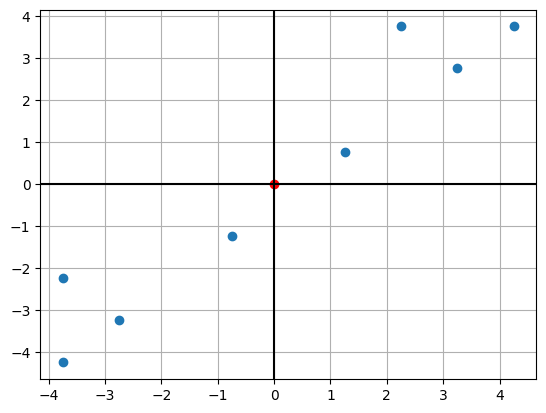

In [6]:
import matplotlib.pyplot as plt

plt.scatter(X_centered[0,:],X_centered[1,:])
plt.axhline(0,color='k')
plt.axvline(0,color='k')

c_mean = X_centered.mean(axis=1)

plt.scatter(c_mean[0],c_mean[1],color='r')
plt.grid()
plt.show()

In [ ]:
X_centered.mean(axis=1)

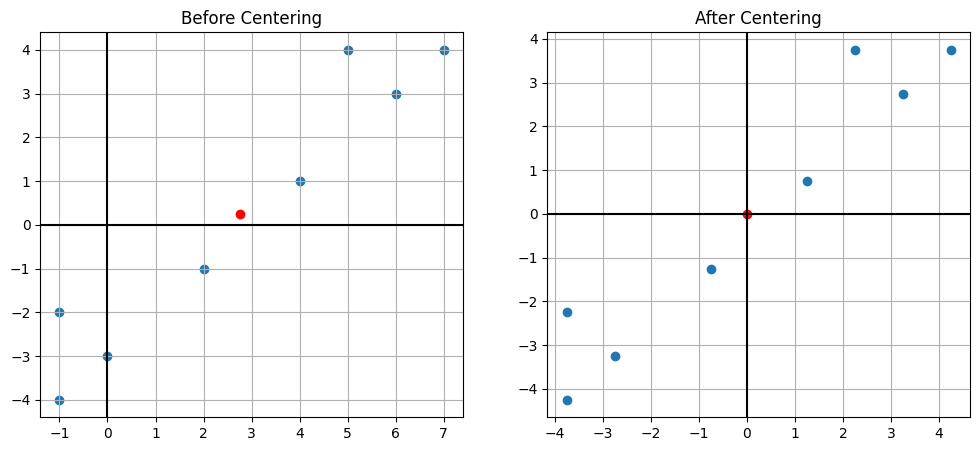

In [7]:
#Compare the two graphs
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X[0,:],X[1,:])
plt.axhline(0,color='k')
plt.axvline(0,color='k')

x_mean = X.mean(axis=1)

plt.scatter(x_mean[0],x_mean[1],color='r')
plt.grid()
plt.title("Before Centering")



plt.subplot(1, 2, 2)
plt.scatter(X_centered[0,:],X_centered[1,:])
plt.axhline(0,color='k')
plt.axvline(0,color='k')

c_mean = X_centered.mean(axis=1)

plt.scatter(c_mean[0],c_mean[1],color='r')
plt.grid()
plt.title("After Centering")

plt.show()

## Find the covariance matrix

The covariance matrix is given by
$\mathbf{C} \ =\ \frac{1}{n}\sum \limits_{i\ =\ 1}^{n} \mathbf {x}_{i}\mathbf {x}_{i}^{T} \ =\ \frac{1}{n}\mathbf{XX}^{T}$

In [8]:
def covariance(X):
    return X @ X.T / X.shape[1]

C = covariance(X_centered)
d = C.shape[0]
print(C)

[[8.9375 8.5625]
 [8.5625 8.9375]]


## Compute the principal components

The $k^{th}$ principal component is given by the eigenvector corresponding to the $k^{th}$ largest eigenvalue

In [9]:
def compute_pc(C):
    d = C.shape[0]
    eigval, eigvec = np.linalg.eigh(C)
    w_1, w_2 = eigvec[:, -1], eigvec[:, -2]
    return w_1, w_2

w_1, w_2 = compute_pc(C)

w_1 = w_1.reshape(w_1.shape[0],1)
w_2 = w_2.reshape(w_2.shape[0],1)

print(w_1)
print(w_2)

[[0.70710678]
 [0.70710678]]
[[-0.70710678]
 [ 0.70710678]]


##Reconstruction using the two PCs
The scalar projection of the dataset on $k^{th}$ PC is given by $ \mathbf{X}_{\text{centered}}^{T} \ .\ \mathbf{w_{k}}$

The vector projection of the dataset on $k^{th}$ PC is given by $\mathbf{w_{k} .(\mathbf{X}_{\text{centered}}^{T} \ .\ \mathbf{w_{k}})^{T}}$



In [10]:
#Since the points are 2-dimensional, by combining the projection on the two PCs, we get back the centered dataset
w_1 @ (X_centered.T @ w_1).reshape(1,n) + w_2 @ (X_centered.T @ w_2).reshape(1,n)

array([[ 1.25,  2.25,  3.25,  4.25, -0.75, -3.75, -2.75, -3.75],
       [ 0.75,  3.75,  2.75,  3.75, -1.25, -2.25, -3.25, -4.25]])

Let us see the reconstruction error for a point along the first principal component

In [11]:
#The reconstruction error by the first PC is given by
X_1 = np.array((1.25,0.75))
p_1 = X_centered[:,0]

#Let the reconstruction of the first point using first PC be given by
p_2 = w_1 @ (X_1 @ w_1)
print("The reconstruction error with first PC is "+ str(np.sum(np.square(p_1 - p_2))))

The reconstruction error with first PC is 0.125


The reconstruction error for the entire dataset along the first principal component will be

In [12]:
#Reconstruction error for each point when considering the first principal component
rec_error_1 = np.square(np.linalg.norm(X_centered[:,] - (w_1 @ (X_centered.T @ w_1).reshape(1,n))[:,], axis=0))
print(rec_error_1)

[0.125 1.125 0.125 0.125 0.125 1.125 0.125 0.125]


In [ ]:
#Total reconstruction error when considering first principal component

print("The reconstruction error along the first principal component is " + str(np.round((rec_error_1).mean(),4)))

The reconstruction error along the first principal component is 0.375


The reconstruction error for the entire dataset along $\mathbf{w}_r$ will be

In [14]:
w_r = np.array([0,1]).reshape(-1,1)

In [15]:
#Reconstruction error for each point when considering the vector w_r
rec_error_r = np.square(np.linalg.norm(X_centered[:,] - (w_r @ (X_centered.T @ w_r).reshape(1,n))[:,], axis=0))
print(rec_error_r)

[ 1.5625  5.0625 10.5625 18.0625  0.5625 14.0625  7.5625 14.0625]


In [16]:
print("The reconstruction error along w_r is "+str((rec_error_r).mean()))

The reconstruction error along w_r is 8.9375


For our dataset we can see that the reconstruction error is much lower along the first principal component as compared to the vector $\mathbf{w}_r$

## Finding the optimal value of K

In [1]:
#Sort the eigenvalues in descending order
eigval, eigvec = np.linalg.eigh(C)
eigval = eigval[::-1]

NameError: name 'np' is not defined

In [18]:
def var_thresh(k):
  tot_var = 0
  req_var = 0
  for x in eigval:
    tot_var += x
  for y in range(k):
    req_var += eigval[y]

  return (req_var/tot_var)

for i in range(d+1):
  print("The explained variance when K is "+str(i)+" is "+str(np.round(var_thresh(i),4)))

The explained variance when K is 0 is 0.0
The explained variance when K is 1 is 0.979
The explained variance when K is 2 is 1.0


## PCA on a real-world Dataset

We will be working with a subset of the [MNIST dataset](https://en.wikipedia.org/wiki/MNIST_database). The cell below generates the data-matrix $\mathbf{X}$, which is of shape $(d, n)$, where $n$ denotes the number of samples and $d$ denotes the number of features.

In [19]:
##### DATASET GENERATION #####
import numpy as np
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X = X_train[y_train == 2][: 100].reshape(-1, 28 * 28).T
test_image = X_test[y_test == 2][0].reshape(28 * 28)

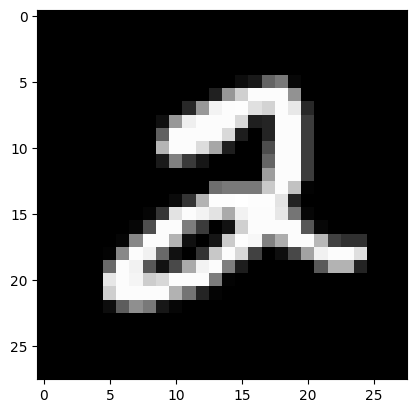

In [20]:
# Observe the first image in the dataset
import matplotlib.pyplot as plt
img = X[:,0].reshape(28, 28)
plt.imshow(img, cmap = 'gray');

We need to center the dataset $\mathbf{X}$ around its mean. Let us call this centered dataset $\mathbf{X}^{\prime}$.

In [21]:
def center(X):
    return X - X.mean(axis = 1).reshape(-1,1)

d, n = X.shape
X_prime = center(X)


Compute the covariance matrix $\mathbf{C}$ of the centered dataset.

In [22]:
def covariance(X):
    return X @ X.T / X.shape[1]

C = covariance(X_prime)

Compute the first and second principal components of the dataset, $\mathbf{w}_1$ and $\mathbf{w}_2$.

In [23]:
def compute_pc(C):
    d = C.shape[0]
    eigval, eigvec = np.linalg.eigh(C)
    w_1, w_2 = eigvec[:, -1], eigvec[:, -2]
    return w_1, w_2

w_1, w_2 = compute_pc(C)

Visualize the first principal component as an image.

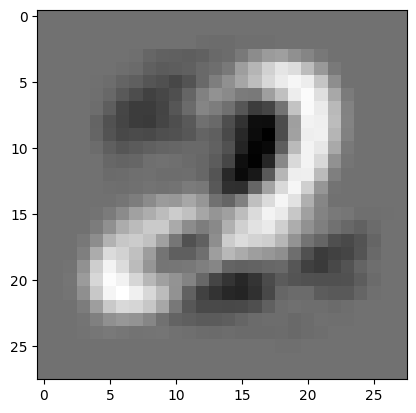

In [24]:
w_1_image = w_1.reshape(28, 28)
plt.imshow(w_1_image, cmap = 'gray')

Given a `test_image`, visualize the proxies  by reconstructing it using the top $k$ principal components. Consider four values of $k$; values of $k$ for which the top-$k$ principal components explain:

- 20% of the variance
- 50% of the variance
- 80% of the variance
- 95% of the variance

Text(0.5, 1.0, 'Test Image')

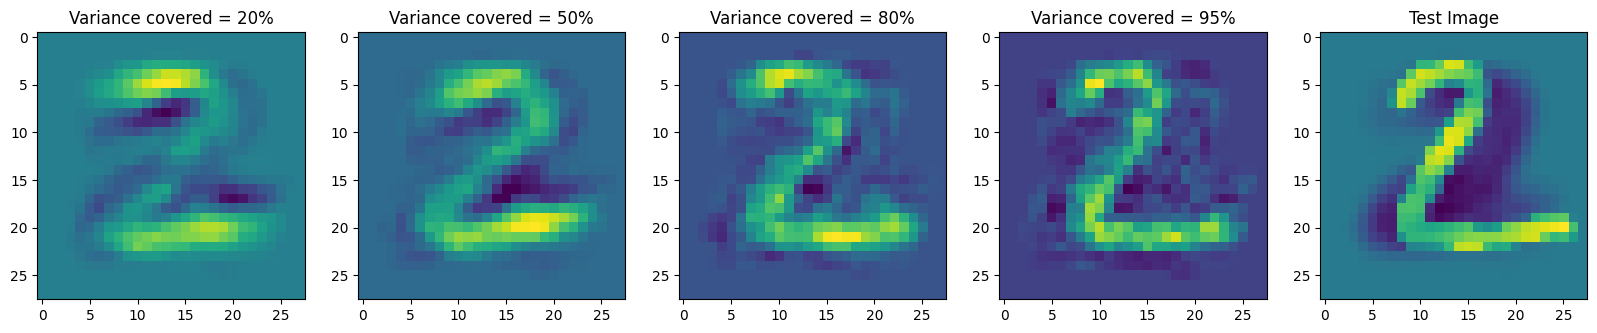

In [25]:
def reconstruct(C, test_image, thresh):
    eigval, eigvec = np.linalg.eigh(C)
    eigval = list(reversed(eigval))
    tot = sum(eigval)
    K = len(eigval)
    for k in range(len(eigval)):
        if sum(eigval[: k + 1]) / tot >= thresh:
            K = k + 1
            break
    W = eigvec[:, -K: ]
    coeff = test_image @ W
    return W @ coeff

plt.figure(figsize=(20,20))
# 0.20
recon_image = reconstruct(C, test_image, 0.20)
plt.subplot(1, 5, 1)
plt.imshow(recon_image.reshape(28, 28))
plt.title("Variance covered = 20%")
# 0.5
recon_image = reconstruct(C, test_image, 0.50)
plt.subplot(1, 5, 2)
plt.imshow(recon_image.reshape(28, 28))
plt.title("Variance covered = 50%")
# 0.80
recon_image = reconstruct(C, test_image, 0.80)
plt.subplot(1, 5, 3)
plt.imshow(recon_image.reshape(28, 28))
plt.title("Variance covered = 80%")
# 0.95
plt.subplot(1, 5, 4)
recon_image = reconstruct(C, test_image, 0.95)
plt.imshow(recon_image.reshape(28, 28))
plt.title("Variance covered = 95%")
# Original mean subtracted image
test_image = np.float64(test_image) - X.mean(axis = 1)
plt.subplot(1, 5, 5)
plt.imshow(test_image.reshape(28, 28))
plt.title("Test Image")